## Notebook Purpose
This notebook is used to plot subplots for figure 3/4: velocity and flux divergence of individual glaciers.

#### Last updated: sometime in February 2023, before turning in the thesis

## TODO:
- Update imports when new library has been built up with all updates
-Generalise path to data products during revisions, after the data distribution plan is finalized


In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'


In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter,velocity_timeseries
import warnings
warnings.filterwarnings('ignore')

/swbuild/sbhusha1/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%matplotlib inline

In [4]:
%cd /nobackup/sbhusha1/chapter2/

/nobackupp11/sbhusha1/chapter2


## Ngozumpa

In [12]:
vx_fn = 'ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = 'ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
divq2_fn = 'ngozumpa/20230217/ngozumpa_farinotti_2012-12-23_to_2015-01-15_lag_smb_products/ngozumpa_farinotti_2012-12-23_to_2015-01-15_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['ngozumpa'])).to_crs('EPSG:32645')
ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 50.0
Extent: [466125.0, 3089921.0, 476775.0, 3104071.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 3: ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: ngozumpa/20230217/ngozumpa_farinotti_2012-12-23_to_2015-01-15_lag_smb_products/ngozumpa_farinotti_2012-12-23_to_2

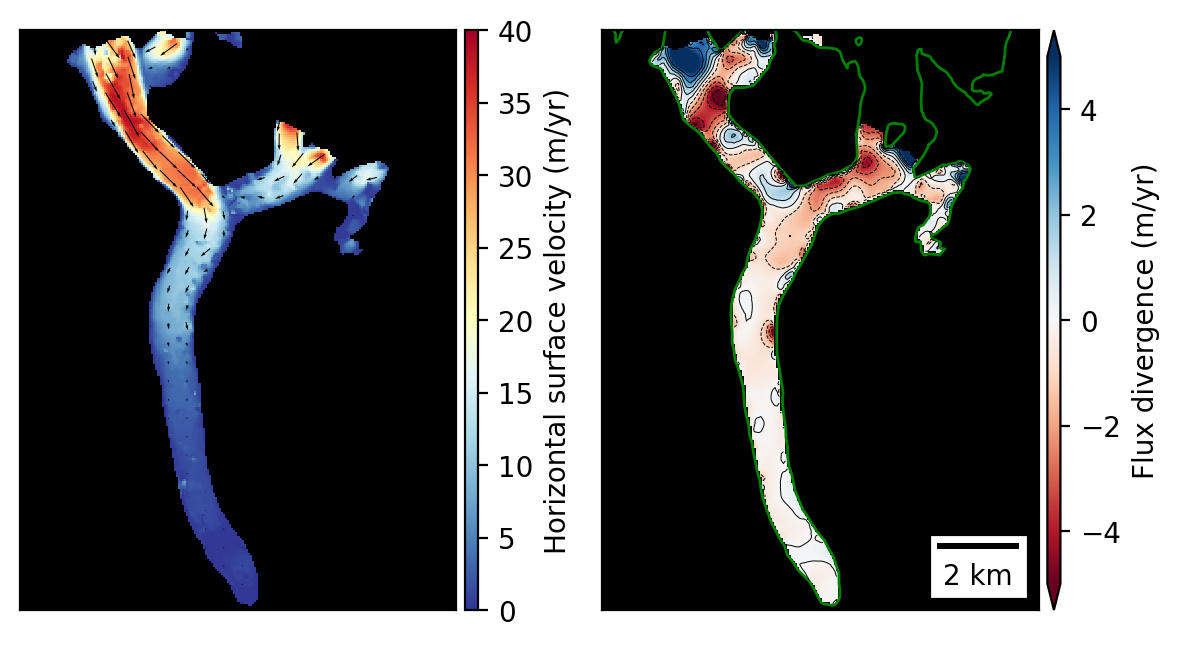

In [13]:
f,ax = plt.subplots(1,2,figsize=(6,4))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,40),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=9,scale=5,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1)
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
#plt.tight_layout()a
f.savefig('figures/ngozumpa_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.tight_layout()

## Langtang

In [5]:
vx_fn = 'langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = 'langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
divq2_fn = 'langtang/20230223/langtang_farinotti_2015-02-22_to_2016-01-07_lag_smb_products/langtang_farinotti_2015-02-22_to_2016-01-07_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['langtang'])).to_crs('EPSG:32645')
ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 25.0
Extent: [368087.5, 3121737.5, 375912.5, 3139937.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 728 ns: 313 res: 25.000
0...10...20...30...40...50...60...70...80...90...2 of 3: langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: langtang/20230223/langtang_farinotti_2015-02-22_to_2016-01-07_lag_smb_products/langtang_farinotti_2015-02-22_to_2016-01-07_di

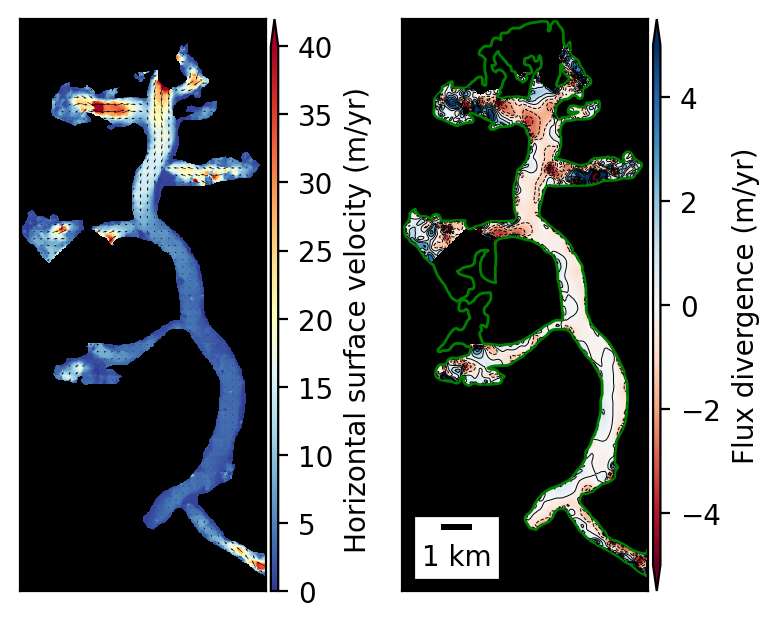

In [10]:
f,ax = plt.subplots(1,2,figsize=(4,4))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,40),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=9,scale=5,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1,location='lower left')
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
#plt.tight_layout()a
f.savefig('figures/langtang_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

## Lirung

In [14]:
vx_fn = 'lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_1_masked_gauss_fill51px.tif'
vy_fn = 'lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_1_masked_gauss_fill51px.tif'
divq2_fn = 'lirung/202320218/lirung_farinotti_2016-11-06_to_2017-12-22_lag_smb_products/lirung_farinotti_2016-11-06_to_2017-12-22_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['lirung'])).to_crs('EPSG:32645')
ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 25.0
Extent: [357337.5, 3122712.5, 359212.5, 3126237.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_1_masked_gauss_fill51px.tif
nl: 141 ns: 75 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 3: lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_1_masked_gauss_fill51px.tif
nl: 141 ns: 75 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: lirung/202320218/lirung_farinotti_2016-11-06_to_2017-12-22_lag_smb_products/lirung_farinotti_2016-11-06_to_2017-12-

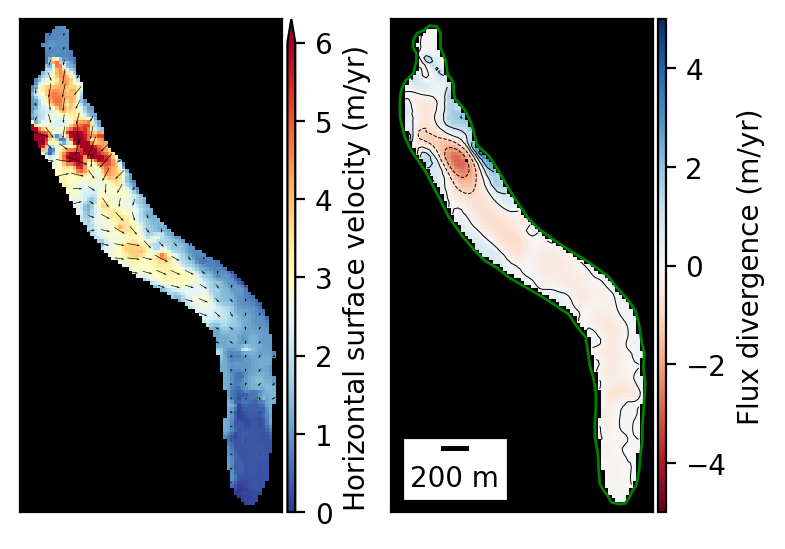

In [17]:
f,ax = plt.subplots(1,2,figsize=(4,3))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,6),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=4,scale=2,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1,location='lower left')
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
#plt.tight_layout()a
f.savefig('figures/lirung_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

## Black Changri Nup

In [18]:
vx_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_shpclip.tif'
vy_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_shpclip.tif'
divq2_fn = 'changrinup/20230217/black_changri_nup_2015-11-02_to_2016-10-25_lag_smb_products/black_changri_nup_2015-11-02_to_2016-10-25_divQ2_shpclip.tif'
glac_shp = gpd.read_file('/nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp') 

ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 25.0
Extent: [477513.3240276716, 3094506.5654733363, 480557.3240276716, 3098302.5654733363]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_shpclip.tif
nl: 152 ns: 122 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 3: changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_shpclip.tif
nl: 152 ns: 122 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: changrinup/20230217/black_changri_nup_2015-11-02_to_2016-

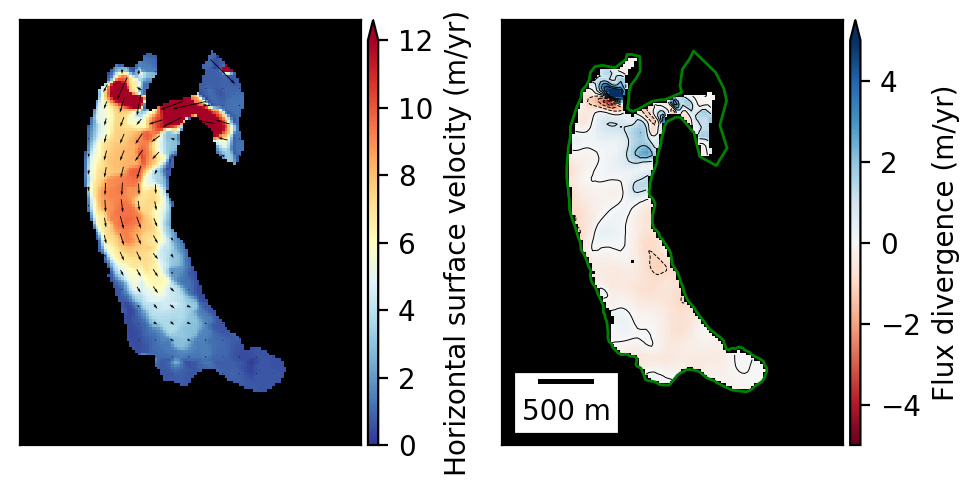

In [24]:
f,ax = plt.subplots(1,2,figsize=(5,4))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,12),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=6,scale=4,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1,location='lower left')
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
#plt.tight_layout()a
f.savefig('figures/blackchangrinup_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

## Khumbu

In [25]:
vx_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
divq2_fn = 'changrinup/20230217/khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['khumbu'])).to_crs('EPSG:32645')
ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 25.0
Extent: [481512.5, 3090517.0, 488435.0, 3099662.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 3: changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: changrinup/20230217/khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to

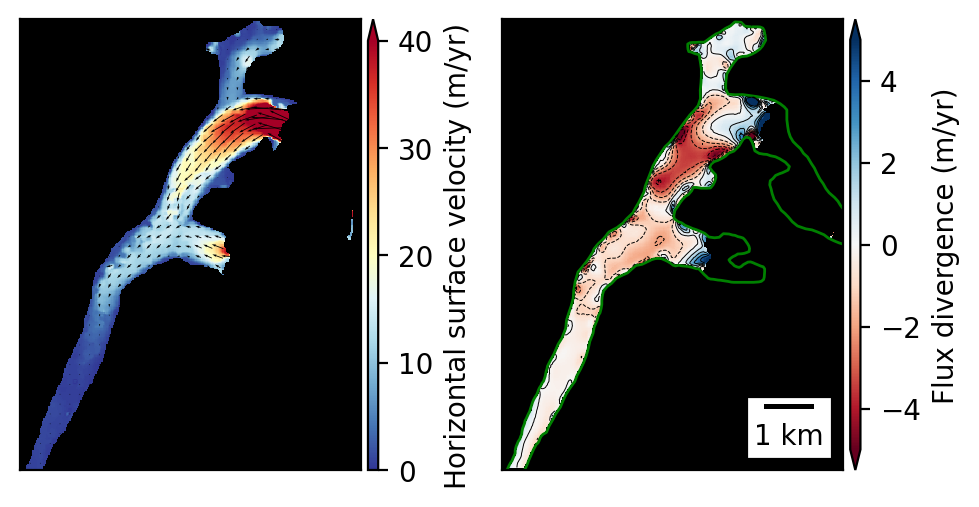

In [28]:
f,ax = plt.subplots(1,2,figsize=(5,5))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,40),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=8,scale=5,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1,location='lower right')
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
plt.tight_layout()
f.savefig('figures/khumbu_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

## Imja Lhotse Shar

In [29]:
vx_fn = 'imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = 'imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
divq2_fn = 'imja/20230223/imja_farinotti_2015-10-02_to_2016-10-29_lag_smb_products/imja_farinotti_2015-10-02_to_2016-10-29_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['imja'])).to_crs('EPSG:32645')
ds_list = warplib.memwarp_multi_fn([vx_fn,vy_fn,divq2_fn],res='last',r='average')
vx_ds = ds_list[0]
vy_ds = ds_list[1]
divq2 = iolib.ds_getma(ds_list[2])
vx = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vx_ds),vx_ds)
vy = velocity_timeseries.mask_by_shp(glac_shp.geometry,iolib.ds_getma(vy_ds),vy_ds)
divq2 = velocity_timeseries.mask_by_shp(glac_shp.geometry,divq2,ds_list[2])
res = geolib.get_res(ds_list[0])[0]
ds_extent = geolib.ds_extent(ds_list[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped


Warping all inputs to the following:
Resolution: 25.0
Extent: [492962.5, 3084915.0, 498337.5, 3092462.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 3: imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: imja/20230223/imja_farinotti_2015-10-02_to_2016-10-29_lag_smb_pro

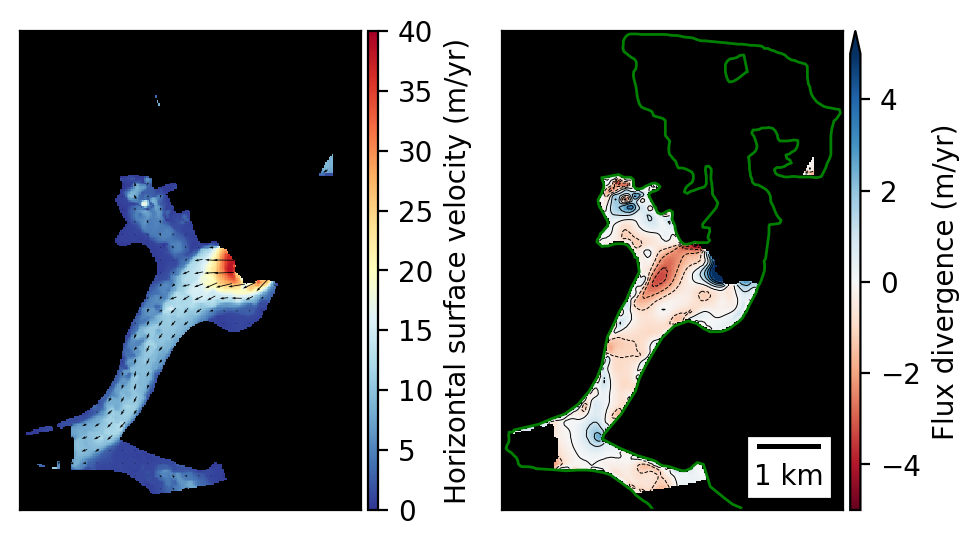

In [38]:
f,ax = plt.subplots(1,2,figsize=(5,4))
pltlib.iv(np.ma.sqrt(vx**2+vy**2),ax=ax[0],cmap='RdYlBu_r',clim=(0,40),skinny=False,
           label='Horizontal surface velocity (m/yr)')

velocity_filter.add_quiver(ax[0],vx,vy,stride=8,scale=5,color='black',quiver_key_units=30,quiver_key=False)
pltlib.iv(divq2,ax=ax[1],cmap='RdBu',clim=(-5,5),skinny=False,label='Flux divergence (m/yr)',extent=fig_extent)
ax[1].contour(divq2,colors='k',linewidths=0.35,levels=np.arange(-5,5).tolist(),extent=contour_extent)
ax2_xlim = ax[1].get_xlim()
ax2_ylim = ax[1].get_ylim()
pltlib.add_scalebar(ax[1],res=1,location='lower right')
glac_shp.plot(ax=ax[1],facecolor='None',edgecolor='green')
ax[1].set_xlim(ax2_xlim)
ax[1].set_ylim(ax2_ylim)
#for axa in ax.ravel():
 #   khumbu_shp.plot(ax=axa,facecolor='None',edgecolor='green')
#for axa in ax:
    #axa.set_xlim(xlim1)
    #axa.set_ylim(ylim1)
plt.tight_layout()
f.savefig('figures/imja_vel_fluxdiv.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
ww